In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
df_index = pd.read_csv("economic_index.csv")

In [5]:
df_index.head(2)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394


In [7]:
##drop unneccessary columns

df_index.drop(columns=["Unnamed: 0",'year','month'],axis=1,inplace=True)

In [9]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

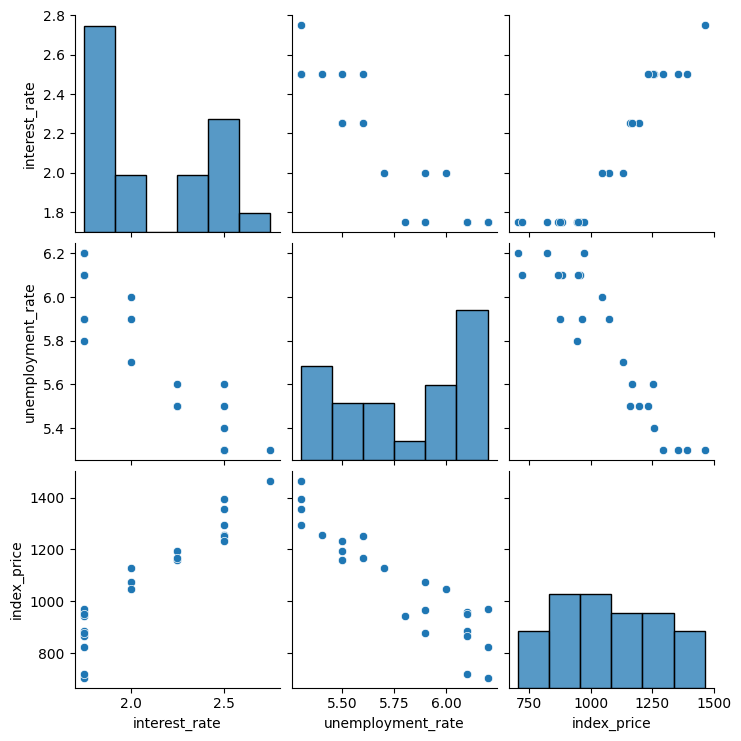

In [12]:
##visualization
import seaborn as sns
sns.pairplot(df_index)

In [13]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


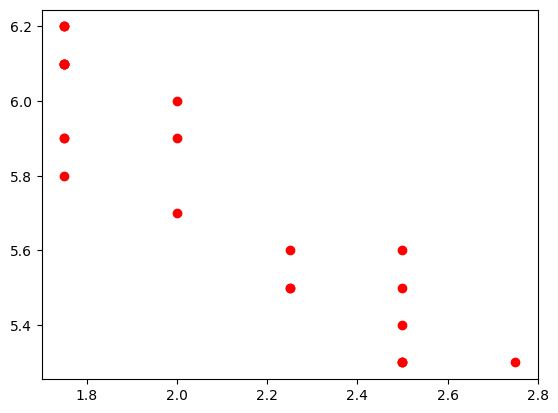

In [15]:
#visulaize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')

In [16]:
###independent and dependent features

X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [20]:
X.head(2)

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3


In [21]:
y.head(4)

0    1464
1    1394
2    1357
3    1293
Name: index_price, dtype: int64

In [22]:
##ttrain test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

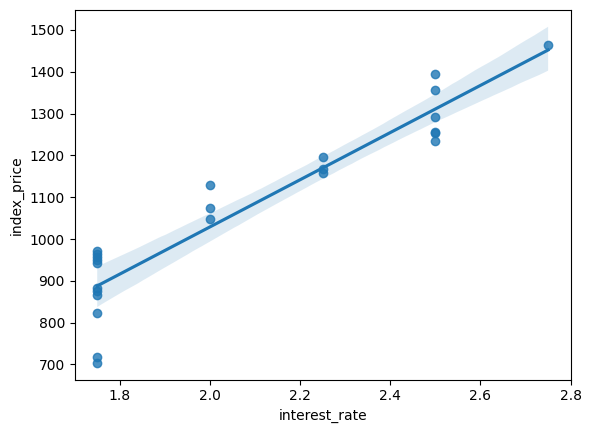

In [27]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

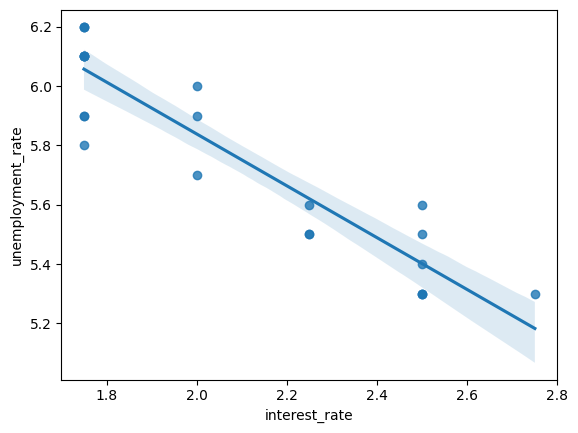

In [28]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [32]:
X_test = scaler.fit_transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [34]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
##sklearn cross val_score
##cross validation method


In [36]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [37]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [38]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [39]:
##predicition

y_pred = regression.predict(X_test)

In [40]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [41]:
##performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [42]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse =np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [43]:
from sklearn.metrics import r2_score

In [44]:
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010257


In [45]:
##adjusted r2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

Assumptions


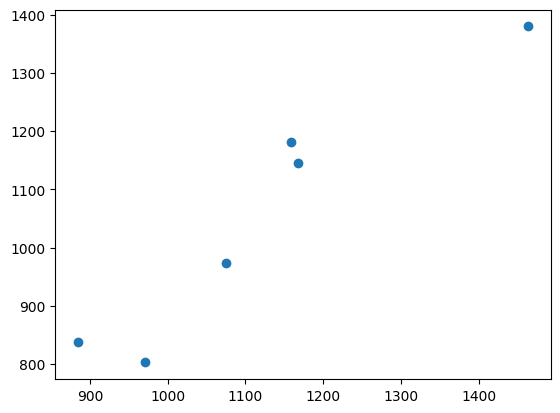

In [46]:
plt.scatter(y_test,y_pred)

In [47]:
residuals  = y_test- y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


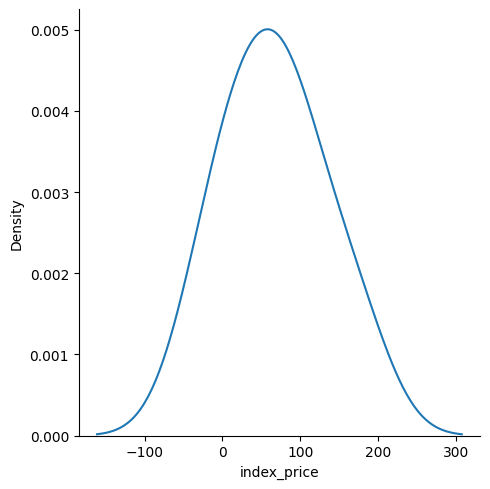

In [49]:
##plot this residuals
sns.displot(residuals,kind='kde')

##below curve means our model is predicted well

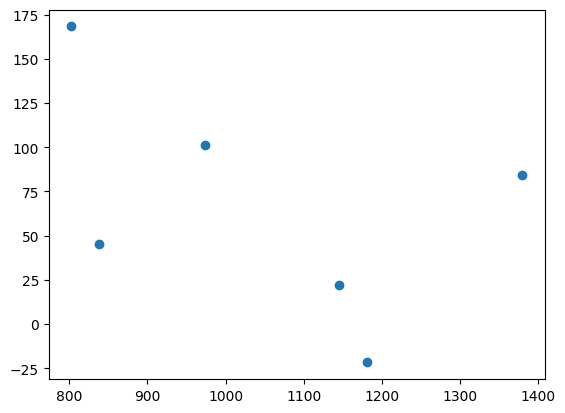

In [50]:
##scatter plot wrt to predicition and residuals
plt.scatter(y_pred,residuals)

In [56]:
regression.coef_

array([  88.27275507, -116.25716066])

In [51]:
import statsmodels.api as sm

In [52]:
model = sm.OLS(y_train,X_train).fit()

In [53]:
prediction =model.predict(X_test)

In [54]:
prediction

array([ 127.30223686, -250.70164745,  326.390126  , -214.91844842,
        -79.59130481,   91.51903783])

In [55]:
model.summary()

c:\Users\Karthik\anaconda3\envs\myenv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 13 Oct 2025   Prob (F-statistic):                       0.754
Time:                        01:12:45   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""